# CS677 Deep Learning – Homework 3

#### Rahaf Alhazmi

###  The best accuracies are 0.98 for the second model and 0.88 for the frist model, each one of them used a diffrent technique.

In [1]:
#import the required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import pandas as pd

#to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
#Prepare dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### The first model

In [61]:
#create the model by using Keras Sequential API

tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([  
     keras.layers.Flatten(input_shape=[28, 28]),
     keras.layers.BatchNormalization(),
     #keras.layers.Dense(100, activation="relu"),
     keras.layers.Dense(150, kernel_initializer='he_normal'),
      keras.layers.PReLU(),
    #keras.layers.BatchNormalization(),
    #keras.layers.Dense(50, activation="relu"),
     #keras.layers.Dense(100, kernel_initializer='he_normal'),
      #keras.layers.PReLU(),
     keras.layers.BatchNormalization(),
    #keras.layers.Dense(50, activation="relu"),
     keras.layers.Dense(50, kernel_initializer='he_normal'),
      keras.layers.PReLU(),
     keras.layers.BatchNormalization(),
      keras.layers.Dense(10, activation='softmax')
])

In [62]:
model.layers

In [63]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_24 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_24 (Dense)            (None, 150)               117750    
                                                                 
 p_re_lu_10 (PReLU)          (None, 150)               150       
                                                                 
 batch_normalization_25 (Bat  (None, 150)              600       
 chNormalization)                                                
                                                                 
 dense_25 (Dense)            (None, 50)               

In [64]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [65]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [66]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
   1/1719 [..............................] - ETA: 10:05 - loss: 3.2832 - accuracy: 0.0312

2022-02-11 23:49:54.184687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.5882 - accuracy: 0.7980

2022-02-11 23:50:07.324009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 14s 8ms/step - loss: 0.5882 - accuracy: 0.7980 - val_loss: 0.4080 - val_accuracy: 0.8584
Epoch 2/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4337 - accuracy: 0.8453 - val_loss: 0.3738 - val_accuracy: 0.8724
Epoch 3/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3999 - accuracy: 0.8570 - val_loss: 0.3648 - val_accuracy: 0.8738
Epoch 4/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3730 - accuracy: 0.8657 - val_loss: 0.3508 - val_accuracy: 0.8756
Epoch 5/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3542 - accuracy: 0.8723 - val_loss: 0.3379 - val_accuracy: 0.8820
Epoch 6/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3409 - accuracy: 0.8774 - val_loss: 0.3386 - val_accuracy: 0.8792
Epoch 7/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3337 - accuracy: 0.8802 - val_loss: 0.3322 - val_accuracy: 0.8

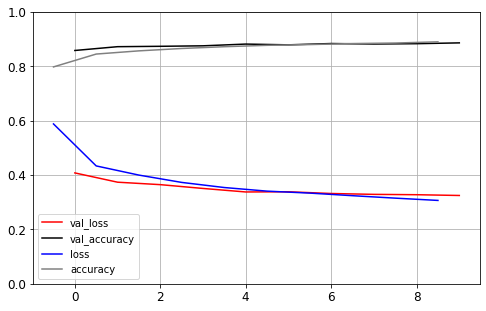

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

colors=[#"blue", "gray", #  loss      accuracy
        "red", "black"] #   val_loss  val_accuracy
                               #df[ ["val_loss","val_accuracy"] ].plot(figsize=(8,5), color=colors)
pd.DataFrame( history.history )[["val_loss","val_accuracy"]].plot(figsize=(8,5), color=colors)

# the validation error is computed at the end of each epoch, while the training error is
# computed using a running mean during each epoch. So the training curve should be shifted by
# half an epoch to the left.
#shift(-0.5)
         #1D array                #list
plt.plot(np.arange(-0.5,9,1), history.history["loss"], c="blue", label="loss")    #must be put after previous code for plotting Dataframe
plt.plot(np.arange(-0.5,9,1), history.history["accuracy"], c="gray", label="accuracy")#must be put after previous code for plotting Dataframe
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

In [68]:
X_new = X_test[:3]

y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

2022-02-11 23:52:07.349081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([9, 2, 1])

In [69]:
model.evaluate( X_test, y_test )

313/313 [==============================] - 1s 4ms/step - loss: 0.3455 - accuracy: 0.8799


[0.3454783260822296, 0.8799000382423401]

In [70]:
history.history['val_accuracy']

[0.8584000468254089,
 0.8724000453948975,
 0.8738000392913818,
 0.8756000399589539,
 0.8820000290870667,
 0.8792000412940979,
 0.8840000629425049,
 0.8822000622749329,
 0.883400022983551,
 0.886400043964386]

The test data accuracy for the first model is ~ 0.88. In this model, we used three different techniques and three layers, and the number of neurons is 150, 50, 10, respectively. We achieved this model after many tries with other models and techniques. 

### The Second model

In [103]:
#splitting the dataset

def split_dataset(X, y):
    y_7_or_8 = (y == 7) | (y == 8) 
    y_A = y[~y_7_or_8]
    y_A[y_A > 8] -= 2 
    y_B = (y[y_7_or_8] == 8).astype(np.float32) 
    return ((X[~y_7_or_8], y_A),
            (X[y_7_or_8], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [104]:
tf.random.set_seed(42)
np.random.seed(42)

In [105]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [106]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [107]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
   5/1376 [..............................] - ETA: 20s - loss: 2.6170 - accuracy: 0.1000 

2022-02-12 00:22:15.603120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1374/1376 [============================>.] - ETA: 0s - loss: 0.8111 - accuracy: 0.7158

2022-02-12 00:22:31.264378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1376/1376 [==============================] - 16s 12ms/step - loss: 0.8109 - accuracy: 0.7159 - val_loss: 0.6132 - val_accuracy: 0.7661
Epoch 2/20
1376/1376 [==============================] - 16s 12ms/step - loss: 0.5364 - accuracy: 0.8051 - val_loss: 0.4994 - val_accuracy: 0.8187
Epoch 3/20
1376/1376 [==============================] - 16s 12ms/step - loss: 0.4838 - accuracy: 0.8221 - val_loss: 0.4638 - val_accuracy: 0.8327
Epoch 4/20
1376/1376 [==============================] - 16s 11ms/step - loss: 0.4582 - accuracy: 0.8303 - val_loss: 0.4491 - val_accuracy: 0.8344
Epoch 5/20
1376/1376 [==============================] - 16s 12ms/step - loss: 0.4404 - accuracy: 0.8358 - val_loss: 0.4349 - val_accuracy: 0.8412
Epoch 6/20
1376/1376 [==============================] - 16s 12ms/step - loss: 0.4287 - accuracy: 0.8411 - val_loss: 0.4665 - val_accuracy: 0.8194
Epoch 7/20
1376/1376 [==============================] - 16s 12ms/step - loss: 0.4188 - accuracy: 0.8442 - val_loss: 0.4171 - val_accura

In [108]:
model_A.save("my_model_A.h5")

In [109]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [110]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [111]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
5/7 [====================>.........] - ETA: 0s - loss: 0.7628 - accuracy: 0.4688

2022-02-12 00:27:51.860432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 0.7458 - accuracy: 0.4900

2022-02-12 00:27:52.129897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 67ms/step - loss: 0.7458 - accuracy: 0.4900 - val_loss: 0.5656 - val_accuracy: 0.7435
Epoch 2/20
7/7 [==============================] - 0s 45ms/step - loss: 0.5366 - accuracy: 0.7500 - val_loss: 0.4401 - val_accuracy: 0.8513
Epoch 3/20
7/7 [==============================] - 0s 44ms/step - loss: 0.4235 - accuracy: 0.8550 - val_loss: 0.3543 - val_accuracy: 0.9102
Epoch 4/20
7/7 [==============================] - 0s 44ms/step - loss: 0.3466 - accuracy: 0.9050 - val_loss: 0.3011 - val_accuracy: 0.9361
Epoch 5/20
7/7 [==============================] - 0s 44ms/step - loss: 0.2955 - accuracy: 0.9500 - val_loss: 0.2624 - val_accuracy: 0.9491
Epoch 6/20
7/7 [==============================] - 0s 43ms/step - loss: 0.2566 - accuracy: 0.9650 - val_loss: 0.2333 - val_accuracy: 0.9571
Epoch 7/20
7/7 [==============================] - 0s 44ms/step - loss: 0.2273 - accuracy: 0.9800 - val_loss: 0.2114 - val_accuracy: 0.9581
Epoch 8/20
7/7 [======================

In [112]:
model_B.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_59 (Dense)            (None, 300)               235500    
                                                                 
 dense_60 (Dense)            (None, 100)               30100     
                                                                 
 dense_61 (Dense)            (None, 50)                5050      
                                                                 
 dense_62 (Dense)            (None, 50)                2550      
                                                                 
 dense_63 (Dense)            (None, 50)                2550      
                                                                 
 dense_64 (Dense)            (None, 1)               

In [113]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [114]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [115]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [116]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - ETA: 0s - loss: 0.6454 - accuracy: 0.6200

2022-02-12 00:27:57.969888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-12 00:27:58.185767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 65ms/step - loss: 0.6454 - accuracy: 0.6200 - val_loss: 0.6492 - val_accuracy: 0.6038
Epoch 2/4
7/7 [==============================] - 0s 43ms/step - loss: 0.6219 - accuracy: 0.6400 - val_loss: 0.6270 - val_accuracy: 0.6158
Epoch 3/4
7/7 [==============================] - 0s 42ms/step - loss: 0.6005 - accuracy: 0.6450 - val_loss: 0.6055 - val_accuracy: 0.6317
Epoch 4/4
7/7 [==============================] - 0s 44ms/step - loss: 0.5797 - accuracy: 0.6750 - val_loss: 0.5833 - val_accuracy: 0.6567
Epoch 1/16
5/7 [====================>.........] - ETA: 0s - loss: 0.4744 - accuracy: 0.8125

2022-02-12 00:27:59.378766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 0.4730 - accuracy: 0.8150

2022-02-12 00:27:59.667183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 70ms/step - loss: 0.4730 - accuracy: 0.8150 - val_loss: 0.3810 - val_accuracy: 0.9012
Epoch 2/16
7/7 [==============================] - 0s 45ms/step - loss: 0.3358 - accuracy: 0.9300 - val_loss: 0.3029 - val_accuracy: 0.9481
Epoch 3/16
7/7 [==============================] - 0s 47ms/step - loss: 0.2719 - accuracy: 0.9700 - val_loss: 0.2528 - val_accuracy: 0.9611
Epoch 4/16
7/7 [==============================] - 0s 49ms/step - loss: 0.2300 - accuracy: 0.9800 - val_loss: 0.2208 - val_accuracy: 0.9671
Epoch 5/16
7/7 [==============================] - 0s 46ms/step - loss: 0.2016 - accuracy: 0.9800 - val_loss: 0.1965 - val_accuracy: 0.9721
Epoch 6/16
7/7 [==============================] - 0s 44ms/step - loss: 0.1799 - accuracy: 0.9900 - val_loss: 0.1781 - val_accuracy: 0.9770
Epoch 7/16
7/7 [==============================] - 0s 46ms/step - loss: 0.1633 - accuracy: 0.9900 - val_loss: 0.1622 - val_accuracy: 0.9790
Epoch 8/16
7/7 [======================

In [117]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 7ms/step - loss: 0.1002 - accuracy: 0.9840


[0.10022583603858948, 0.984000027179718]

In [118]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 6ms/step - loss: 0.0931 - accuracy: 0.9890


[0.09308028221130371, 0.9890000224113464]

The test data accuracy for the second model is ~ 0.98 for model B and 0.99 for model b on A. In this model, we used Reusing Pretrained Layers technique. 